In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./Datasets/cardiovascular_diagnosis.csv', sep=';')

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


```
Convert age to int
```

In [6]:
data['age'] = round(data['age']/365.25, 2).astype('int')

In [7]:
data.duplicated().sum()

0

```
Drop id column
```

In [8]:
data.drop('id', axis=1, inplace=True)

```
Display rows and columns
```

In [9]:
data.shape

(70000, 12)

```
Check if there are missing values in each colum 
There are no missing values in the dataste
```

In [10]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

```
Count if isnull values
```

In [11]:
data.isnull().count()

age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64

```
Object columns are usually string,
but can also be arbitrary Python object (lists, dic)
```

In [12]:
data.dtypes

age              int32
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

```
Static Overview
```

In [13]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.807329,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.762506,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


```
Visualizing of cases occurs according the age
```

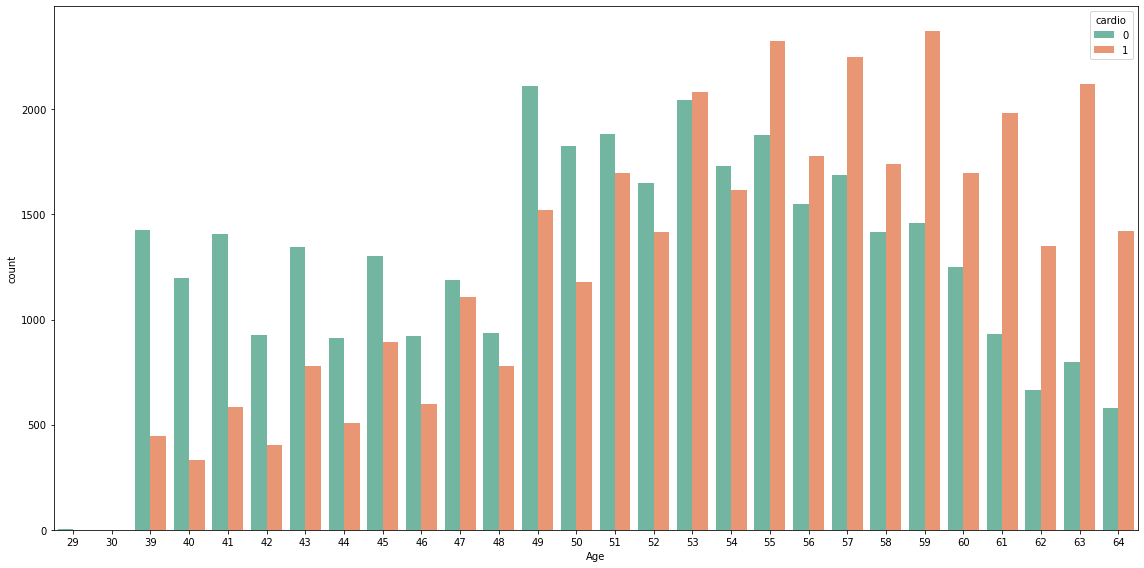

In [14]:
rcParams['figure.figsize'] = 16, 8
sns.countplot(x='age', hue='cardio', data=data , palette='Set2')
plt.xlabel("Age")
plt.tight_layout()
plt.show()

```
Visualizing presence or absence of cardiovascular disease
```

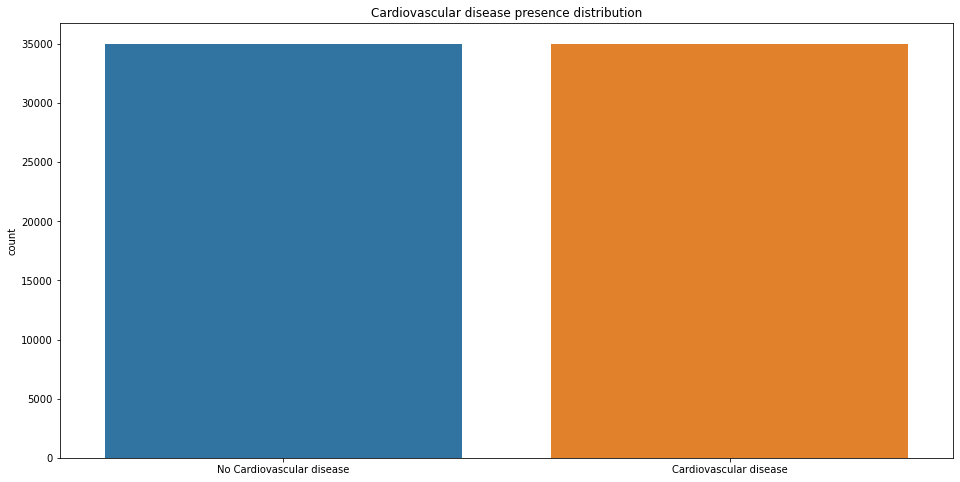

In [15]:
rcParams['figure.figsize'] = 16, 8
fx = sns.countplot(x='cardio', data=data)
fx.set_title('Cardiovascular disease presence distribution')
fx.set_xticklabels(['No Cardiovascular disease', 'Cardiovascular disease'])
plt.xlabel("")
plt.show()

````
Visualizing of cases occurs according the gender
````

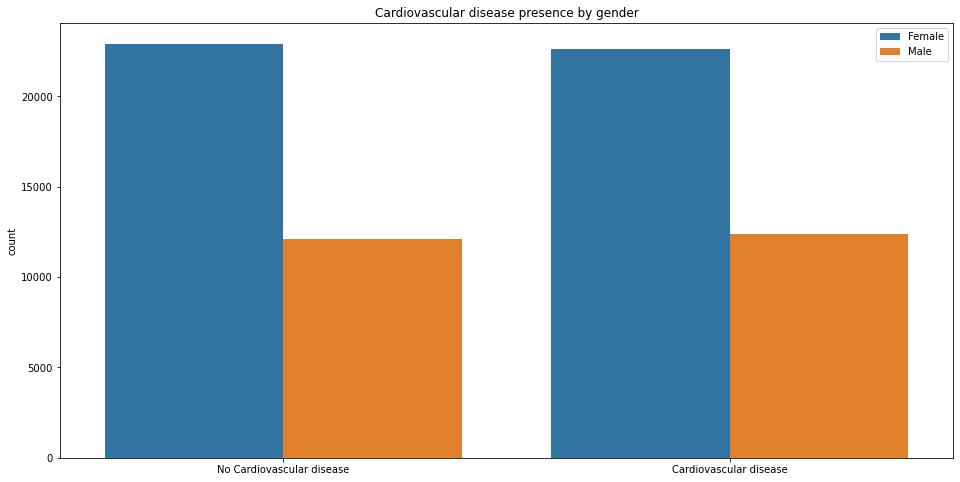

In [16]:
rcParams['figure.figsize'] = 16, 8
fx = sns.countplot(x='cardio', data=data, hue='gender')
plt.legend(['Female', 'Male'])
fx.set_title('Cardiovascular disease presence by gender')
fx.set_xticklabels(['No Cardiovascular disease', 'Cardiovascular disease'])
plt.xlabel("")
plt.show()

```
Cholesterol
1. normal
2. above normnal
3. well above normnal

Glucose
1. normal
2. above normnal
3. well above normnal

Outlier identification in categorical veriables
```

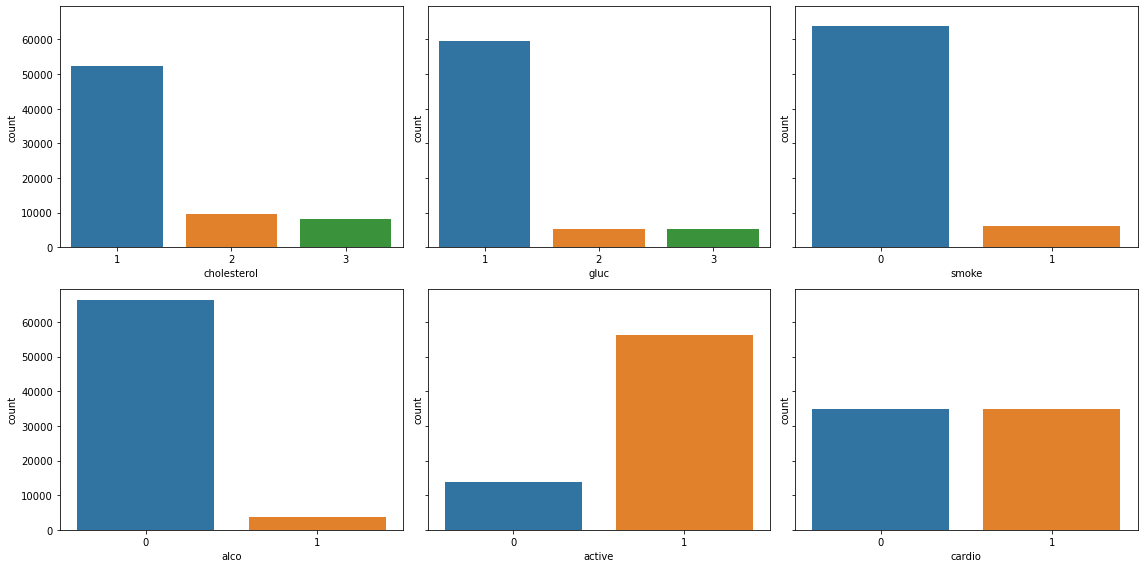

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharey=True)
sns.countplot(data=data, x='cholesterol', ax=axes[0, 0])
sns.countplot(data=data, x='gluc', ax=axes[0, 1])
sns.countplot(data=data, x='smoke', ax=axes[0, 2])
sns.countplot(data=data, x='alco', ax=axes[1, 0])
sns.countplot(data=data, x='active', ax=axes[1, 1])
sns.countplot(data=data, x='cardio', ax=axes[1, 2])
plt.tight_layout()
plt.show()

```
Distribution of the target veriables on quantitative features
```

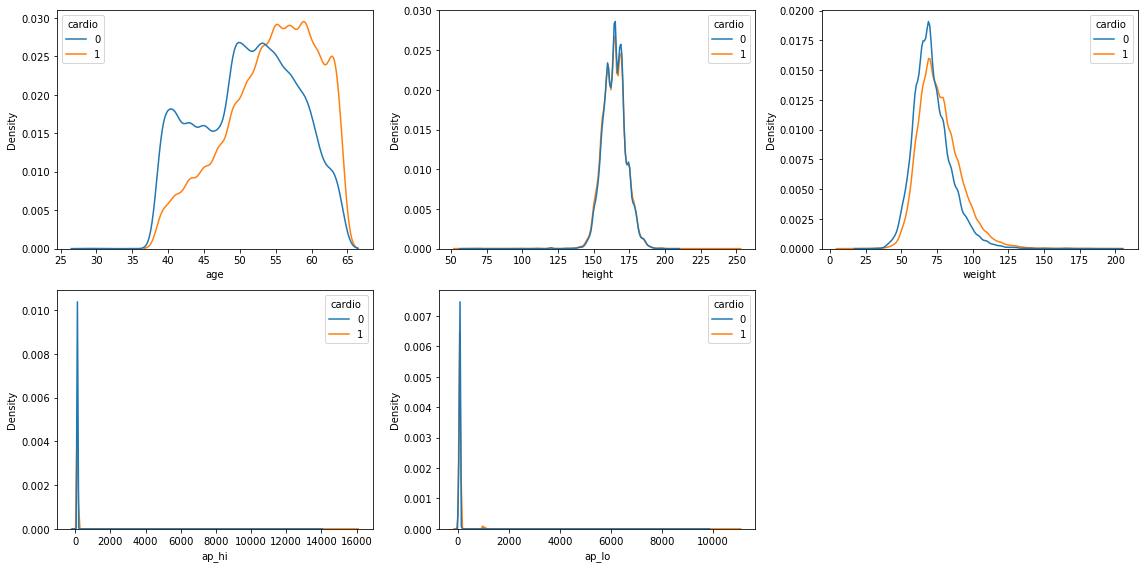

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
sns.kdeplot(data=data, x='age', hue='cardio', ax=axes[0, 0])
sns.kdeplot(data=data, x='height', hue='cardio', ax=axes[0, 1])
sns.kdeplot(data=data, x='weight', hue='cardio', ax=axes[0, 2])
sns.kdeplot(data=data, x='ap_hi', hue='cardio',  ax=axes[1, 0])
sns.kdeplot(data=data, x='ap_lo', hue='cardio', ax=axes[1, 1])

fig.delaxes(axes[1,2])

plt.tight_layout()
plt.show()

```
Display min values ap_hi and ap_lo
```

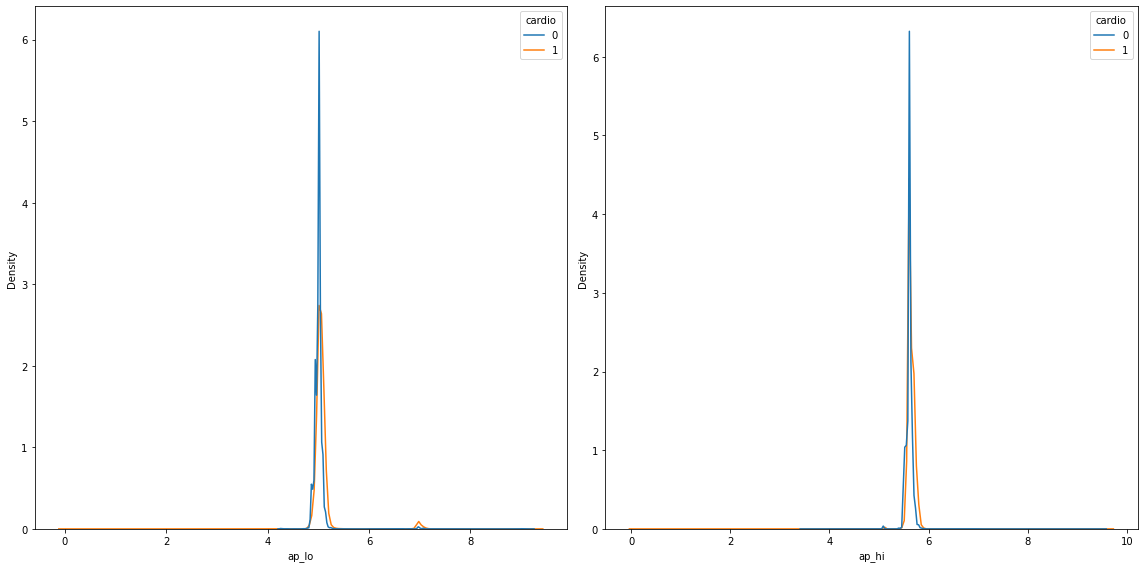

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.kdeplot(x=np.log(data['ap_lo']+abs(data['ap_lo'].min()) + 1), hue=data['cardio'], ax=axes[0])
sns.kdeplot(x=np.log(data['ap_hi']+abs(data['ap_hi'].min()) + 1), hue=data['cardio'], ax=axes[1])
plt.tight_layout()
plt.show()

```
Display the distribution
```

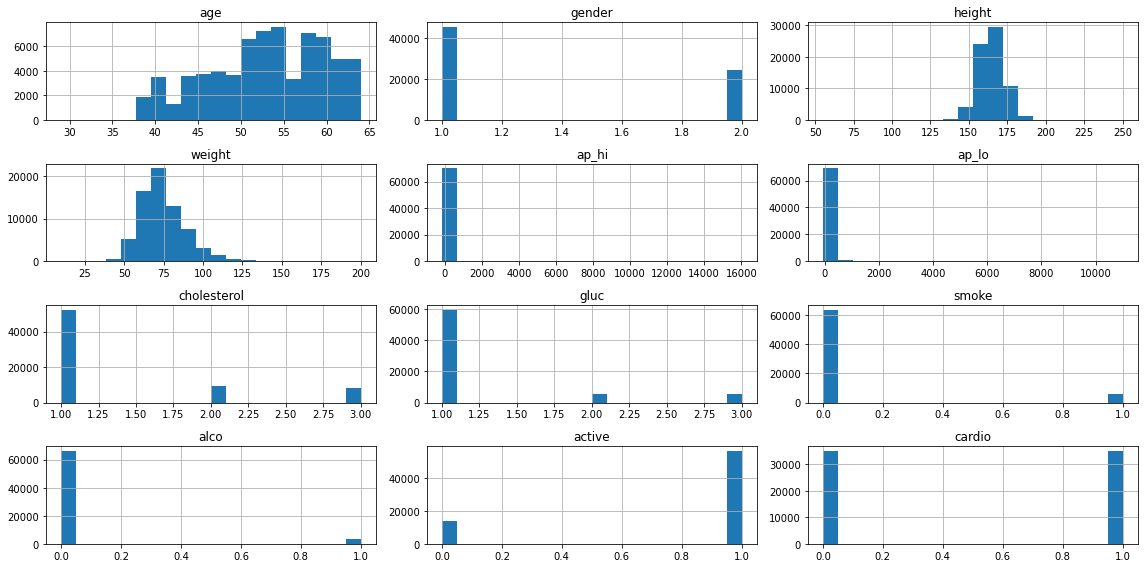

In [20]:
data.hist(figsize=(16, 8),stacked=True,  bins=20)
plt.tight_layout()
plt.show()

```
Check the correlation between gender and cardio
```

In [21]:
corr = data[['gender', 'cardio']].corr()
corr.style.background_gradient(cmap='Blues')

,gender,cardio
gender,1.000000,0.008109
cardio,0.008109,1.000000


```
Check the correlation between height and cardio
```

In [22]:
corr = data[['height', 'cardio']].corr()
corr.style.background_gradient(cmap='Blues')

,height,cardio
height,1.000000,-0.010821
cardio,-0.010821,1.000000


```
Check the correlation between weight and cardio
```

In [23]:
corr = data[['weight', 'cardio']].corr()
corr.style.background_gradient(cmap='Blues')

,weight,cardio
weight,1.000000,0.181660
cardio,0.181660,1.000000


```
Check the correlation between Systolic blood pressure and cardio
```

In [24]:
corr = data[['ap_hi', 'cardio']].corr()
corr.style.background_gradient(cmap='Blues')

,ap_hi,cardio
ap_hi,1.000000,0.054475
cardio,0.054475,1.000000


```
Check the correlation between Diastolic blood pressure and cardio
```

In [25]:
corr = data[['ap_lo', 'cardio']].corr()
corr.style.background_gradient(cmap='Blues')

,ap_lo,cardio
ap_lo,1.000000,0.065719
cardio,0.065719,1.000000


```
Check the correlation between cholesterol and cardio
```

In [26]:
corr = data[['cholesterol', 'cardio']].corr()
corr.style.background_gradient(cmap='Blues')

,cholesterol,cardio
cholesterol,1.000000,0.221147
cardio,0.221147,1.000000


```
Check the correlation between Glucose and cardio
```

In [27]:
corr = data[['gluc', 'cardio']].corr()
corr.style.background_gradient(cmap='Blues')

,gluc,cardio
gluc,1.000000,0.089307
cardio,0.089307,1.000000


```
Check the correlation between age and cardio
```

In [28]:
corr = data[['age', 'cardio']].corr()
corr.style.background_gradient(cmap='Blues')

,age,cardio
age,1.000000,0.237946
cardio,0.237946,1.000000


```
How many Smokers and Non-Smokers
```

In [29]:
numbers = data['smoke'].value_counts('0')
numbers

0    0.911871
1    0.088129
Name: smoke, dtype: float64

In [30]:
number_ns = 70000 *  0.088129
number_s =  70000 *  0.911871
print(f'There are {int(number_ns)} Non-Smoke and {int(number_s)} Smokers in the data set.')

There are 6169 Non-Smoke and 63830 Smokers in the data set.


```
Pearson Correlation Coefficient & P-value
Calculate the Pearson Correlation Coefficient and P-value of height and cardio
```

In [31]:
pearson_coef, p_value = stats.pearsonr(data['height'], data['cardio'])
print('The Pearson correlation Coefficient is: ', pearson_coef, 'with a p_value of p', p_value)
pearson_coef, p_value = stats.pearsonr(data['height'], data['cardio']) 

The Pearson correlation Coefficient is:  -0.010821058331005218 with a p_value of p 0.004196298812995185


```
Calculate the Pearson Correlation Coefficient and P-value of weight and cardio
```

In [32]:
pearson_coef, p_value = stats.pearsonr(data['weight'], data['cardio'])
print('The Pearson correlation Coefficient is: ', pearson_coef, 'with a p_value of p', p_value)

The Pearson correlation Coefficient is:  0.18165956179862539 with a p_value of p 0.0


```
Calculate the Pearson Correlation Coefficient and P-value of Systolic blood pressure and cardio
```

In [33]:
pearson_coef, p_value = stats.pearsonr(data['ap_hi'], data['cardio'])
print('The Pearson correlation Coefficient is: ', pearson_coef, 'with a p_value of p', p_value)

The Pearson correlation Coefficient is:  0.05447505392686507 with a p_value of p 3.69809212578645e-47


```
Calculate the Pearson Correlation Coefficient and P-value of Diastolic blood pressure and cardio
```

In [34]:
pearson_coef, p_value = stats.pearsonr(data['ap_lo'], data['cardio'])
print('The Pearson correlation Coefficient is: ', pearson_coef, 'with a p_value of p', p_value)

The Pearson correlation Coefficient is:  0.06571869614919185 with a p_value of p 7.424551291398159e-68


```
Calculate the Pearson Correlation Coefficient and P-value of Cholesterol and cardio
```

In [35]:
pearson_coef, p_value = stats.pearsonr(data['cholesterol'], data['cardio'])
print('The Pearson correlation Coefficient is: ', pearson_coef, 'with a p_value of p', p_value)

The Pearson correlation Coefficient is:  0.22114727391239244 with a p_value of p 0.0


```
Calculate the Pearson Correlation Coefficient and P-value of Glucose and cardio
```

In [36]:
pearson_coef, p_value = stats.pearsonr(data['gluc'], data['cardio'])
print('The Pearson correlation Coefficient is: ', pearson_coef, 'with a p_value of p', p_value)

The Pearson correlation Coefficient is:  0.0893068873243055 with a p_value of p 6.483042590436901e-124


```
Calculate the pearson correlation Coefficient & and P-value  all of them with cardio
```

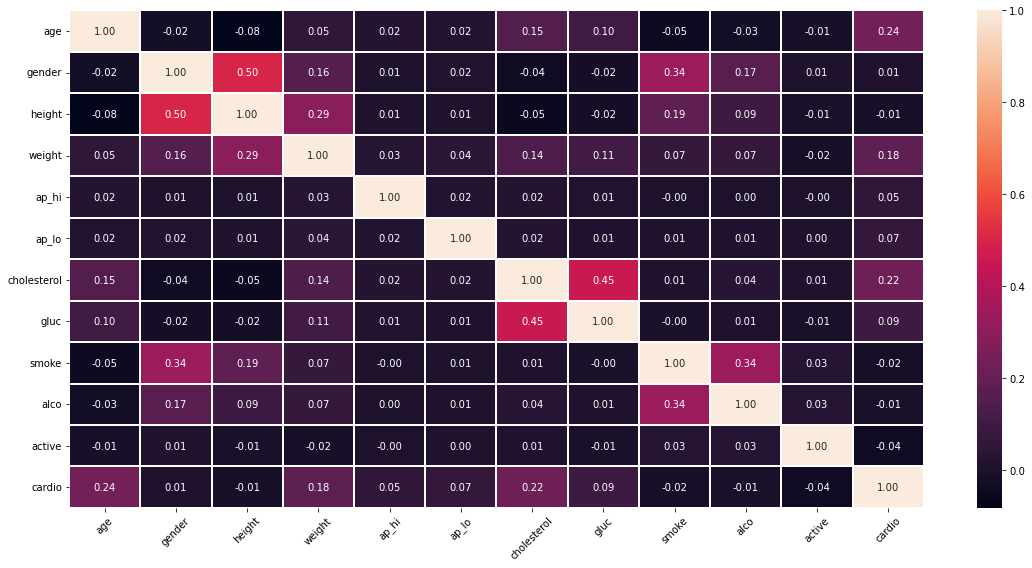

In [37]:
heat_map = sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

```
Machine Learning
Reorder the columns order of the dataframe
```

In [38]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [39]:
column_names = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio']

In [40]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [41]:
data.reindex(columns=column_names)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [42]:
X = data.drop('cardio', axis=1)
y = data['cardio']

In [43]:
# Split the into train and test samples
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
y_train.value_counts()

1    28048
0    27952
Name: cardio, dtype: int64

In [45]:
y_test.value_counts()

0    7069
1    6931
Name: cardio, dtype: int64

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [48]:
models = {
    "LogisticRegression": LogisticRegression(),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTre": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Classifier": SVC()

}